# About Project
**Group No: 6**

**Group Members: Rahul Hipparkar, Lily Holmes, Andrea Caceres, Isra Marcu**

**Project Name: Campus Event Scheduling System**

**Github Repo link**:  https://github.com/RahulHipparkar/DSA-GP1---Campus-Event-Scheduling-System

**Objective**: We’ve been hired to design a lightweight scheduling system for managing campus events (talks, hackathons, concerts, exams, etc.). The system must allow adding, searching, sorting, and conflict-checking events efficiently as the event list grows from a handful to thousands.

Our group will design and implement custom data structures and algorithms to power the system, compare their performance, and present results.




# Importing files as modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from src.models.event import Event
from src.models.ArrayList import DynamicArray
from src.models.LinkedList import LinkedList
from src.searching.Linear_Search import linear_search
from src.searching.Binary_Search import binary_search,sort
from src.sorting.Get_Key import key
from src.sorting.Insertion_Sort import insertion_sort
from src.sorting.Slicing import slice_array
from src.sorting.Merge_Sort import merge_sort
from src.sorting.Quick_Sort import quick_sort
from src.sorting.Insertion_Sort_Linked_List import insertion_sort_linked_list
from src.sorting.Merge_Sort_Linked_List import merge_sort_list
from src.sorting.Quick_Sort_Linked_List import quickSort
from src.searching.Conflict_Detection import find_conflicts,display_conflicts

# Random generator for dynamic array

In [16]:
import datetime
import random
import time
def random_time():
    hour = random.randint(0, 23)
    minute = random.randint(0, 59)
    return f"{hour:02d}:{minute:02d}"
def random_date():
# initialize start and end dates
  start_date = datetime.date(2025, 8, 22)
  end_date   = datetime.date(2026, 5, 15)

  # create a single random day
  num_days = (end_date - start_date).days
  rand_days = random.randint(1, num_days)
  random_date = start_date + datetime.timedelta(days = rand_days)

  return random_date.strftime("%Y-%m-%d")

def create_random_DynamicArray(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = DynamicArray() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

In [17]:
arr = create_random_DynamicArray(50)
arr.list_all()

[{'Id': 2410, 'Title': 'talk', 'Date': '2026-02-23', 'Time': '22:21', 'Location': 'Norlin Room B'},
 {'Id': 55, 'Title': 'concert', 'Date': '2026-02-04', 'Time': '19:12', 'Location': 'Norlin Room B'},
 {'Id': 3326, 'Title': 'talk', 'Date': '2026-04-25', 'Time': '14:44', 'Location': 'Norlin Room A'},
 {'Id': 7693, 'Title': 'talk', 'Date': '2025-12-18', 'Time': '23:10', 'Location': 'Baca'},
 {'Id': 4329, 'Title': 'hackathon', 'Date': '2025-11-15', 'Time': '21:39', 'Location': 'Norlin Room B'},
 {'Id': 234, 'Title': 'orientation', 'Date': '2026-03-29', 'Time': '04:02', 'Location': 'Norlin Room B'},
 {'Id': 442, 'Title': 'exam', 'Date': '2026-02-06', 'Time': '08:21', 'Location': 'Folsom'},
 {'Id': 4647, 'Title': 'orientation', 'Date': '2026-02-20', 'Time': '09:15', 'Location': 'Norlin Room A'},
 {'Id': 7998, 'Title': 'exam', 'Date': '2026-02-27', 'Time': '09:19', 'Location': 'Norlin Room A'},
 {'Id': 5105, 'Title': 'orientation', 'Date': '2025-09-01', 'Time': '10:36', 'Location': 'Norlin R

# Random Generator for Linked List

In [18]:
def create_random_LinkedList(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = LinkedList() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

# Experimentation

## Comparing runtime of sorting algorithms for dynamic arrays

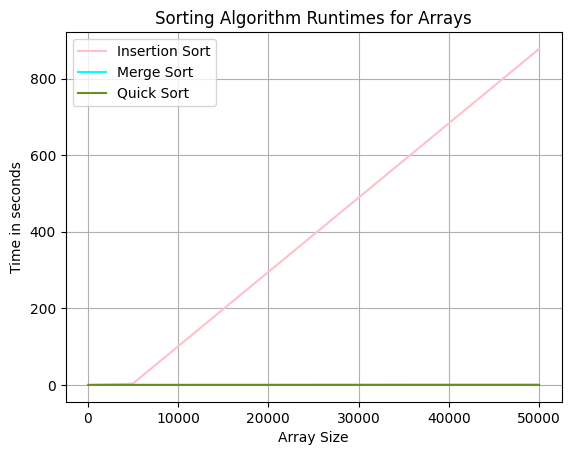

In [19]:
def measure_time(function):
  start = time.time()
  function()
  end= time.time()
  return round(end - start, 5)

merge_sort_runtime = []
insertion_sort_runtime = []
quick_sort_runtime = []

size = [50,500,5000,50000]
for i in size:
    arr = create_random_DynamicArray(i)
    merge_sort_runtime.append(measure_time(lambda: merge_sort(arr)))
    insertion_sort_runtime.append(measure_time(lambda: insertion_sort(arr)))
    quick_sort_runtime.append(measure_time(lambda: quick_sort(arr,0,len(arr)-1)))

plt.plot(size, insertion_sort_runtime, color = 'pink', label='Insertion Sort')
plt.plot(size, merge_sort_runtime,color = 'cyan',label='Merge Sort')
plt.plot(size, quick_sort_runtime,color = 'olivedrab', label='Quick Sort')
plt.xlabel('Array Size')
plt.ylabel('Time in seconds')
plt.title('Sorting Algorithm Runtimes for Arrays')
plt.legend()
plt.grid(True)

**Inference**:

- Here we can see, insertion sort on  dynamic array gives a time complexity of O(N^2). For smaller input sizes , it performs comparably to merge sort and quick sort showing negligible runtime differences.
- Quick sort and Merge sort gives same performance with O(NlogN) time complexity as we see an overlap in runtime.

## Comparing runtime of sorting alogrithm for Linked List

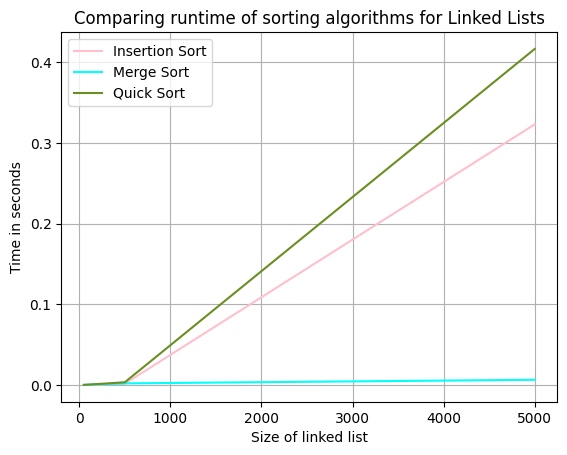

In [20]:
import sys
sys.setrecursionlimit(100000)
merge_sort_ll_runtime = []
insertion_sort_ll_runtime = []
quick_sort_ll_runtime = []

size = [50,500,5000]
for i in size:
    List = create_random_LinkedList(i)
    merge_sort_ll_runtime.append(measure_time(lambda: merge_sort_list(List.head)))
    insertion_sort_ll_runtime.append(measure_time(lambda: insertion_sort_linked_list(List)))
    quick_sort_ll_runtime.append(measure_time(lambda: quickSort(List.head)))

plt.plot(size, insertion_sort_ll_runtime, color = 'pink', label='Insertion Sort')
plt.plot(size, merge_sort_ll_runtime, color = 'cyan',label='Merge Sort')
plt.plot(size, quick_sort_ll_runtime, color = 'olivedrab',label='Quick Sort')
plt.xlabel('Size of linked list')
plt.ylabel('Time in seconds')
plt.title('Comparing runtime of sorting algorithms for Linked Lists')
plt.legend()
plt.grid(True)


**Inference**:
- Here we can observe that , quick sort on linked list is performing worse than the insertion sort with time complexity of O(N^2). For smaller input sizes, all 3 algorithms performs comparably with negligible runtime differences.
- Like quick sort , insertion sort on linked lists exhibits time complexity of O(N^2) as we can observe from above plot.
- Merge sort performs better than the quick sort and insertion sort as it exhibits time complexity of O(NlogN).
- Here N is the number of nodes in the linked list.

## Comparing runtime of unsorted vs sorted data

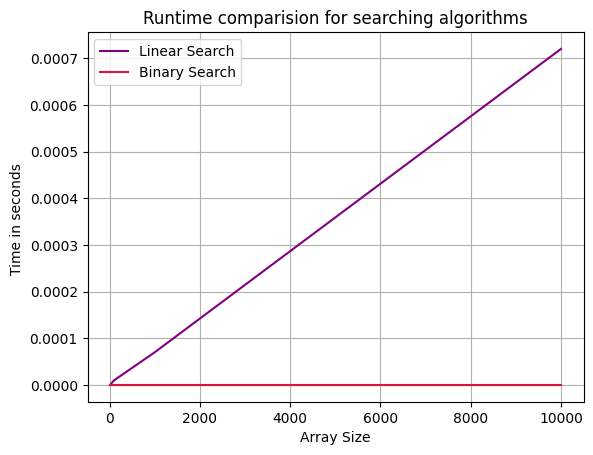

In [21]:
binary_search_runtime = []
linear_search_runtime = []

size = [10,100,1000,10000]
for i in size:
    arr = create_random_DynamicArray(i)
    sorted_arr = sort(arr)
    id = random.randint(1,10000)
    linear_search_runtime.append(measure_time(lambda: linear_search(arr,id)))
    binary_search_runtime.append(measure_time(lambda: binary_search(sorted_arr,id)))

plt.plot(size, linear_search_runtime, color = 'purple',label='Linear Search')
plt.plot(size,binary_search_runtime,color = 'crimson',label='Binary Search')
plt.xlabel('Array Size')
plt.ylabel('Time in seconds ')
plt.title('Runtime comparision for searching algorithms')
plt.legend()
plt.grid(True)

**Inference**:

- Here, we can see binary search performs better than the linear search in searching an event by id with time complexity of O(log N). But we need to keep in mind that binary search only works for sorted data.
- Linear search gives time complexity of O(N) for unsorted data. 

## Computing runtime for conflict detection

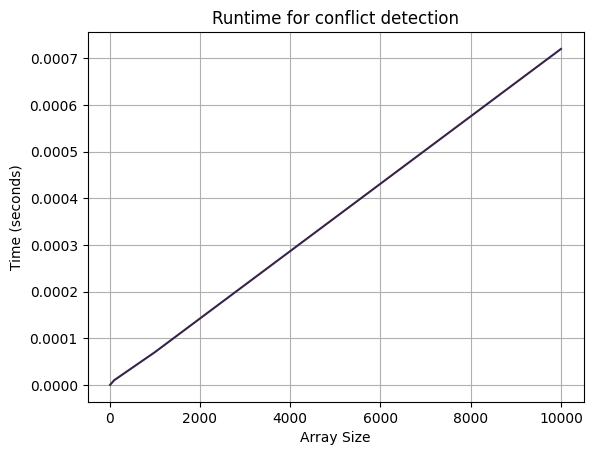

In [22]:
conflict_detection_runtime = []
size = [10,100,1000,10000]
for i in size:
    arr = create_random_DynamicArray(i)
    conflict_detection_runtime.append(measure_time(lambda: find_conflicts(arr)))
    
plt.plot(size, linear_search_runtime, color = '#372248')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Runtime for conflict detection')
plt.grid(True)
plt.show()

**Inference**

Here we can see conflict detection algorithm works in linear time - O(N). We achieved this time complexity as we are utilizing dictionary data structure to detect and store conflicted events with overlapping time on same date.

**Optimization**:

- The approach is already optimized with linear time complexity of O(N) as we are using hashing.
- But we can still make it leaner in memory and bit faster by avoiding building big lists by unless a actual conflict occurs.
- Do not allocate list for every key(date). Most keys will have only one event.
- Add to 'conflicts dictionary'  only when the second event for a key arrives.
-  Here we can use sweep line algorithm for parallel conflict detection. First we divide events into buckets by date, then we sort events by time and finally sweeps through sorted events by maintaining active queue of events.
  

# Scalability

## Esimating memory usage by dynamic array and linked list of 100000 events

In [23]:
import psutil, os
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss/1024/1024

In [24]:
before = memory_usage()
create_random_DynamicArray(100000)
after = memory_usage()
memory_usage_DA = after-before
print(f"Memory usage by dynamic array for 100000 events : {memory_usage_DA:.2f} MB")

Memory usage by dynamic array for 100000 events : 33.11 MB


In [32]:
import psutil, os
def memory_usage_ll():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss/1024/1024

In [33]:
before = memory_usage_ll()
create_random_LinkedList(100000)
after = memory_usage_ll()
memory_usage_ll = after - before
print(f"Memory usage by linked list for 100000 events : {memory_usage_ll:.2f} MB")

Memory usage by linked list for 100000 events : 71.80 MB


In [34]:
import pandas as pd
pd.DataFrame({'Data Structure': ['Dynamic Array', 'Linked List'], 'Memory Usage':[f'{memory_usage_DA:.2f} MB', f'{memory_usage_ll:.2f} MB']})

,Data Structure,Memory Usage
0,Dynamic Array,33.11 MB
1,Linked List,71.80 MB


**Inference**:

Here, we can see linked list uses more memory to store 100k events than the array as each node in linked list is a python object with two attributes value and a reference. While each entry in array is a reference. That's why linkedlist here takes more memory than the arrays to store 1M events.

## Optimization:
- Optimizations could be applied for the detection of parallel conflicts. A structure such as a hybrid approach through a sweep line algorithm would have better time and space complexity. This would sort the events by time and date while maintaining a set of active appointments. This achieves a time complexity of O(n log n) because it is able to execute multiple functions at once. In the creation of the event with the start and end times, it also simultaneously sweeps the schedule to detect other events that would overlap.
The sweep line approach would be suitable for situations where there are thousands of events to be logged and checked.

- Using hybird structures  such as cursor-based (array) linked list or unrolled linked list (chunked vector)rather than pointers is a way to optimize linked lists. This is done by storing next indices in the arrays. Excluding the insertion sorting methods, arrays can be used more memory efficiency.




## Sketch for parallel conflict detection 

![Parallel Conflict Detection Flowchart](Parallel_Conflict_Detection.png)


**steps for parallel conflict detection**:


1. Create an array from the instances of the event 
2. group the array by the event dates
3. Sort the events by the start time
4. If there are still evens to be sorted, then add an index for the current event and the previous event. If not, skip to step 7
5. Take the difference between the start times of the current and previous events
6. If the start time differences is less than 60, this means that the events overlap. If so, then add the events to another array for conflicting events.
7. Return the array of conflicting events


# Results 

Our results for the various data structures and ways to sort and search will allow the heavier weight schedule system to be built robustly and efficiently. A large difference was found in the searching of algorithms. When given the task to search for an event by the event id, the binary search on the sorted dynamic array was found to be the most time efficient. From our runtime benchmarker, we found that when searching a schedule with 10,000 events, the binary search drastically outperformed the linear search as the linear search took over 0.00225 seconds.

Similarly, for sorting linked lists, a necessary process in the implementation of the binary search for unsorted lists, we found that merge sort out-preformed both insertion and quicksort. At its worst case, the worst case time complexity of quicksort is O(n^2).

This project allowed us to learn and practice technical skills such as the creation and management data structures and classic necessary operations. It was interesting seeing how operations are used in real life situations such as a campus scheduler. This cemented our knowledge of object oriented programming in Python. The group format for the project allowed us to meet and connect with classmates as well as strengthen our skills in collaboration.